# BIOEE 4940 : **Introduction to Quantitative Analysis in Ecology**
### ***Spring 2021***
### Instructor: **Xiangtao Xu** ( ✉️ xx286@cornell.edu)
### Teaching Assistant: **Yanqiu (Autumn) Zhou** (✉️ yz399@cornell.edu)

---

## <span style="color:royalblue">Lab 1</span> *Python Basics, I/O, and Visualization*
*Partly adapted from [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro)*

* Python is an interpreted, high-level and general-purpose programming language, first released in 1991 by Guido van Rossum.

* R vs Python - an inaccurate comparison....
  (read more [here](https://dev.to/daveparr/the-real-difference-tm-between-python-and-r-for-data-science-280i))

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--ReZqX08z--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://pbs.twimg.com/media/Ce8VP0FWIAI0ad2%3Fformat%3Djpg%26name%3Dsmall" alt="R vs Python" style="width: 600px;"/>


---

### 1. Fundamentals of Python

In this section, we will talk about some fundamental features of the Python language, including basic **data types, flow control, and mathematical operations**. Generally, these are also key aspects to quickly understand a programming langugage and its difference with other langugages. Some delicacies in the fundamentals might also lead to common bugs in your analyses.

Currently, the majority of the science community uses Python 3 although you might encounter legacy codes written in Python 2 in your own research. Sometimes, you will run into errors when running Python 2 codes with Python 3 because there are several key changes in Python 3, such as:

* `print` is a function
* Integer division returns a float 
* Unicode is used for encoding code
* ...

**1.1. Numbers and Math**

Numbers further include integers and floats (real numbers), which are stored differently in computer memory and might show different behaviors under mathematical and other operations.



In [1]:
# comments are anything that comes after the "#" symbol
a_int = 1 # assign an integer 1 to a_int
a_float = 1. # assign a float 1 to a_float

# python also support multiple destination variables when assigning values
a_int, a_float = 1 , 1.

# check their types
print(type(a_int))
print(type(a_float))

<class 'int'>
<class 'float'>


Basic mathematical operations in python includes arithmetic and boolean logic.

In [2]:
# addition / subtraction / multiplication / division

print(1 + 1 - 2 * 3 / 5)


0.8


Note that the results is a float although we only used integer. This is because **division in Python 3 by default returns a float**, while some other languages (e.g. C/Fortran) will truncate the fractions and return an integer, which can lead to bugs in your analysis

In [3]:
## exponentiation

print (2**10)
print (2**0.5)

## rounding

print(round(2**0.5, 4))

# modulo operation

print(12 % 7)   # get the modulus
print(12 // 7)  # get the integer



1024
1.4142135623730951
1.4142
5
1


In [5]:
# Logic and Boolean and relational operator

is_weekday = True
is_snow = False

print(is_weekday and is_snow)
print(is_weekday or is_snow)
print(not (is_weekday and is_snow))
print((not is_weekday) and is_snow) # try to use parenthesis whenever possible to improve readability

False
True


In [7]:
# comparison of number values

a = 5

print(a > 1)
print(a < 10.)
print(a == 5)  # equal
print(a != 5)  # not equal

True
True
True
False


Try to avoid using `==` or `!=` for floats because there could be **numerical errors** after complex mathematical operations.

In [9]:
# a simple example for numerical errors

b = (5 ** 0.0001) ** 10000
print(b)
print(a == b)


# instead compare whether the difference is small enough
abs_tol = 1e-8 # another way to define floats using scientific notation
print(abs(a - b) < abs_tol) # abs() returns the absolute value


5.000000000000083
False
True


**1.2 Strings**

Python has powerful supports for string operations that can comes very handy for dealing with text/character-based data (e.g. species names, genome sequences, qualitative data).

Note that the indexing in python **starts from 0 and is left inclusive**.

In [10]:
# string definition, use either "" or ''

treatment_level = "1"
print(type(treatment_level) is int)

False


In [11]:
burmese_python = "\"Python bivittatus\""
print(burmese_python)

"Python bivittatus"


In [12]:
# index starts from zero and is left inclusive
print(burmese_python[0])
name_length = len(burmese_python)
print(name_length)

"
19


In [13]:
print(burmese_python[name_length-1])
print(burmese_python[-1])
print(burmese_python[1:7])

"
"
Python


In [14]:
# this one will throw out an error
print(burmese_python[name_length])

IndexError: string index out of range

String is a built-in class in python, which has various useful class methods. See [here](https://docs.python.org/2.5/lib/string-methods.html) for more. Here I list a few examples.

In [17]:
# use """ for long strings
oaks = """Quercus rubra,Quercus alba,Quercus velutina"""

# capitalize, use tab to auto-complete the command in jupyter notebook
print(oaks.upper())

QUERCUS RUBRA,QUERCUS ALBA,QUERCUS VELUTINA


In [19]:
# split
print(oaks.split(',')) # returns a list contains all the substrings

['Quercus rubra,Quercus alba,Quercus velutina']


In [20]:
# join
print(' '.join(['Quercus','rubra','is','the','scientific','name','of','red','oak']))

Quercus rubra is the scientific name of red oak


In [21]:
# find the second occurance of a sub-string
print(oaks.find("Quercus",2))

14


In [23]:
# replace (does not change the original string)
print(oaks.replace("rubra","coccinea"))
print('\noriginal oaks:\n',oaks,'\n')
new_oaks = oaks.replace("rubra","coccinea")
print(new_oaks)

Quercus coccinea,Quercus alba,Quercus velutina

original oaks:
 Quercus rubra,Quercus alba,Quercus velutina 

Quercus coccinea,Quercus alba,Quercus velutina


In [25]:
# String math operations
print(("duplicate" + " " + "myself ") * 5) # multiplication with positive integers
print('-'*20)

duplicate myself duplicate myself duplicate myself duplicate myself duplicate myself 
--------------------


Strings can be converted from or into other numerical data types

In [26]:
# string to numbers
num_str = '1'
print(int(num_str))
print(float(num_str))

1
1.0


In [27]:
# numbers to string, check https://realpython.com/python-f-strings/ and https://pyformat.info/ for more details and tricks

pi_val = 3.1415926
print(f'the value of \u03C0 is {pi_val}')

the value of π is 3.1415926


In [33]:
# formatting floating numbers
# L.Sf where L indicates the total length of the final string
# S indicates the number of digits
a = 3
print(f'the value of \u03C0 is {pi_val:4.2f} not {a:f}')

the value of π is 3.14 not 3.000000


In [34]:
# formatting floating numbers into scientific notations
print(f'{12345678:5.3e}')

1.235e+07


In [37]:
year, month, day = 2021, 2, 10
print(f'Today is {year:4d}-{month:02d}-{day:02d}') # formatting the integers, 02 means to use 0 for padding

Today is 2021-02-10


**1.3 Lists and Loops**

List is the built-in structures to represent arrays, which can host heterogenous data types

In [1]:
oaks = """Quercus rubra
Quercus alba
Quercus velutina"""
oak_list = oaks.split('\n')
print(oak_list)

['Quercus rubra', 'Quercus alba', 'Quercus velutina']


In [2]:
# append an element
oak_list.append(1)
print(oak_list)

['Quercus rubra', 'Quercus alba', 'Quercus velutina', 1]


In [40]:
# pop the last element
oak_list.pop()
print(oak_list)

['Quercus rubra', 'Quercus alba', 'Quercus velutina']


In [41]:
# sort the list
oak_list.sort()
print(oak_list)

['Quercus alba', 'Quercus rubra', 'Quercus velutina']


In [43]:
# Different methods loop over the elements of the list
for oak in oak_list:
    print(oak)

Quercus alba
Quercus rubra
Quercus velutina


In [44]:
# use index
oak_num = len(oak_list)
for i in range(oak_num):
    print(oak_list[i])

Quercus alba
Quercus rubra
Quercus velutina


In [45]:
# use enumerate
for i, oak in enumerate(oak_list):
    print(i,oak)
    
# enumerate is equivalent to
for i, oak in zip(range(len(oak_list)),oak_list):
    print(i,oak)

# enumerate function can be very handy to get access to both index and contents at the same time

0 Quercus alba
1 Quercus rubra
2 Quercus velutina
0 Quercus alba
1 Quercus rubra
2 Quercus velutina


In [ ]:
# while loop
i = 0
while i < len(oak_list):
    print(oak_list[i])
    i = i+1

In [46]:
# conditionals and flow control (break/continue)

maple_list=['Acer saccharum','Acer rubrum','Acer platanoides']


tree_list = oak_list + maple_list # + can also operate on list!

print(tree_list)

['Quercus alba', 'Quercus rubra', 'Quercus velutina', 'Acer saccharum', 'Acer rubrum', 'Acer platanoides']


In [47]:
for i, tree in enumerate(tree_list):
    if tree.split(' ')[0] == 'Quercus':
        continue # skip oaks
    
    if tree == 'Acer rubrum':
        break # break out of the loop when encountering red maple
    
    print(i,tree)
    
    
    

3 Acer saccharum


In [52]:
# python has lots of tricks for working with lists

# list comprehension
squares = [n**2 for n in range(10)]
print(squares)

squares = []
for i in range(10):
    squares.append(i**2)
    
squares = np.zeros((10,))
for i in range(10):
    squares[i] = i**2


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [49]:
Cap_Genus_list = [tree.split(' ')[0].upper()+' '+tree.split(' ')[1] for tree in tree_list]
print(Cap_Genus_list)

['QUERCUS alba', 'QUERCUS rubra', 'QUERCUS velutina', 'ACER saccharum', 'ACER rubrum', 'ACER platanoides']


**1.4 Tuples and Dictionaries**

Tuples are similar to lists, but they are ***immutable*** - they can not be extended or modified. So it is *safe* structure to pack together heterogeneous data that you do not want to change (e.g. results of a function).

In [53]:
genus='Quercus'
species='rubrum'
diameter=15.
is_alive=True
tree = (genus,species,diameter,is_alive)
print(tree)
print(tree[1]) # can be indexed like arrays

a,b,c,d = tree # can be unpacked
print(a,b,c,d)

tree[2] = 20. # error

('Quercus', 'rubrum', 15.0, True)
rubrum
Quercus rubrum 15.0 True


TypeError: 'tuple' object does not support item assignment

Dictionaries are useful ***unordered*** structure to map **keys** to **values**

In [54]:
tree_dict = {'genus' : 'Quercus',
             'species' : 'rubrum',
             'diameter' : 15.,
             'is_alive' : True}
print(tree_dict)

{'genus': 'Quercus', 'species': 'rubrum', 'diameter': 15.0, 'is_alive': True}


In [55]:
# OR
tree_dict={} # initialize an empty dictionary using {}
tree_dict['genus'] = 'Quercus'
tree_dict['species'] = 'rubrum'
tree_dict['diameter'] = 15.
tree_dict['is_alive'] = True

print(tree_dict)

{'genus': 'Quercus', 'species': 'rubrum', 'diameter': 15.0, 'is_alive': True}


In [56]:
print('age' in tree_dict.keys())
print('diameter' in tree_dict.keys())

False
True


In [57]:
for key, val in tree_dict.items():
    print(key,val)

genus Quercus
species rubrum
diameter 15.0
is_alive True


### Challenge 1: Convert date string to decimal year

In [58]:
date_str="2021-Feb-10"

month_days = [31,28,31,30,31,30,31,31,30,31,30,31]
month_dict = {
    'Jan' : 1,
    'Feb' : 2,
    'Mar' : 3,
}

date_str_split = date_str.split('-')
year = int(date_str_split[0])
month_day = sum(month_days[0:month_dict[date_str_split[1]]-1])
day = int(date_str_split[2])

print(year + (month_day + day) / sum(month_days))




2021.1123287671232


---
### 2. Numpy and Functions

Numpy is one of the most fundamental parts of the python "ecosystem" for science. Lots of packages are built on top of it.

Numpy includes support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions.

In [1]:
# import the package, similar to library command in R
import numpy as np  # notate the namespace to more specifically call numpy functions

In [ ]:
arr = np.array([11.,12.5, 5.,7.])
print(arr.dtype)
print(arr.shape)


In [ ]:
arr = np.array([[1,2,3],[4,5,6]])
print(arr.dtype)
print(arr.shape)
print(arr)

# note that python's matrix is column-first (c-style)
# elements in the last column are stored next to each other in the memory
# so any operation that manipulate the last column will be more efficient 
# than operating the first column
print(arr.ravel()) # ravel to one dimensional array


In [61]:
# useful commands to generate data/index

print(np.arange(1.,2.,0.25)) # left inclusive
print(np.linspace(1.,2.,5)) # left and right inclusive
print(np.logspace(1.,2.,5)) # default has a 10-base

[1.   1.25 1.5  1.75]
[1.   1.25 1.5  1.75 2.  ]
[ 10.          17.7827941   31.6227766   56.23413252 100.        ]


In [ ]:
# matric creation
print(np.zeros((3,3))) # 3-by-3 zero matrix
print(np.ones((4,4))) # 4-by-4 unity matrix
print(np.diag(np.arange(4))) # diagonal matrix

In [62]:
lon = np.linspace(-100,-80,21)
lat = np.linspace(20,30,11)

xx,yy = np.meshgrid(lat,lon) # useful for plotting spatial maps
print(xx.shape,yy.shape)
print(xx)

(21, 11) (21, 11)
[[20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 

Lots of array operations in numpy are available. All the familiar arithmetic operators are applied on an element-by-element basis

In [ ]:
abundance_mat = np.random.random(xx.shape) 
# generate a [0,1) random matrix with the same shape as xx
print(abundance_mat)

In [ ]:
print(abundance_mat > 0.1) # places with abudnance larger than 0.1
print(sum((abundance_mat > 0.1).ravel())) # total number of elements with abundance larger than 0.1
print(sum((abundance_mat > 0.1).ravel()) / len(abundance_mat.ravel())) # should be close to 0.9

In [63]:
# numpy is efficient in matrix manipulation
# let's use a dot product as an example

# define a function to do dot product ourselves
def my_dot_prod(A,B):
    '''
        This is documentation for a function
    '''
    
    C = np.zeros_like(A)
    
    length = len(C.ravel())
    
    for i in range(length):
        C[i] = A[i] * B[i]
        
    return C

# use numpy dot product
def numpy_prod(A,B):
    
    return A * B


# lets check their performance
A = np.random.random(100)
B = np.random.random(100)

%timeit my_dot_prod(A,B)

%timeit numpy_prod(A,B)
    

257 µs ± 84.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.13 µs ± 494 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Note that values of numeric variables changed in fuctions will not be kept but values of lists/matrices changed in python functions will be kept.

In [ ]:
def modify_values(a):
    a = 1
    b = 1
    print(f'in function a,b = {a}, {b}')
    return (a,b)

a, b = 0, 0
new_a,new_b = modify_values(a)

print(f'after function a,b = {a}, {b}')
print(f'after function new_a,new_b = {new_a}, {new_b}')


In [ ]:
# note that values of lists/matrices changed in python functions will be kept


def modify_list(A,B):
    A.append('new_element')
    B[0] = 1.
    return

A = []
B = np.arange(5)
modify_list(A,B)
print(A)
print(B)



### Challenge 2. Function to account for metabolic temperature sensitivity.
Various metabolic processes are sensitive to temperature due to changes in enzymatic activities. A simple quantitative descritpion of such temperature senstivity is through Q10 (qotient every 10 degree Celcius):

$X = X_0\times Q_{10}^{\frac{T-T_0}{10}}$ 

Write a function to calculate X for input T array given a tuple containing $X_0$, $T_0$, and $Q_{10}$.

What if X saturates after a certain optimal temperature $T_{opt}$? (i.e., $X(T) = X(T_{opt})$ when $T > T_{opt}$)

In [ ]:
params = (10.5,25.,2.) # X_0, T_0, and Q_10
T_opt = 35.

---
### 3. Pandas, Matplotlib, and Cartopy

[Pandas](https://pandas.pydata.org/) is an open source library providing high-performance, easy-to-use data structures and data analysis. It organizes data similarly to R dataframes and is particularly suited to tabular data (e.g. data in excel spreadsheet/csv files)

[Matplotlib](https://matplotlib.org/) is the backbone of data visualization in python.

[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is the package designed for geospatial data analysis and visualization

In [2]:
import pandas as pd

# the basic structure is Series - one-dimensional array with index.

Tree_ID = ['QR1','QR2','QA1','QA2','AR1','AR2']
diameter = [15.5,5.5,20.5,30.,55.,65.]

d_series = pd.Series(diameter,index=Tree_ID)
print(d_series)


QR1    15.5
QR2     5.5
QA1    20.5
QA2    30.0
AR1    55.0
AR2    65.0
dtype: float64


In [3]:
from matplotlib import pyplot as plt # import matplotlib
# allow for inline plotting in jupyter notebook
%matplotlib inline 

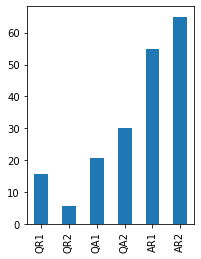

In [5]:
fig = plt.figure(figsize=(3,4)) # figsize in inches
axis_handle = d_series.plot(kind='bar')
# or d_series.plot.bar()


**Indexing**
We can get values using .loc attribute

In [ ]:
print(d_series.loc[['QR1','QA1']]) # use index
print(d_series.iloc[[0,2]]) # use raw position

**DataFrame**
equivalent to a table in a spreadsheet

In [ ]:
# assume we know the allometric equation to convert tree diameter to tree height
tree_height = np.exp(1.0 + 0.5 * np.log(d_series.values))

# add tree species
species_dict = {'QA' : 'Quercus Alba',
                'QR' : 'Quercus Rubrum',
                'AR' : 'Acer Rubrum'}

tree_species = [species_dict[tree_index[0:2]] for tree_index in d_series.index]

# create a datafrome from a dictionary
data = {'Species' : tree_species,
        'Diameter' : d_series.values,
        'Height' : tree_height}

df = pd.DataFrame(data,index=Tree_ID)
print(df)


In [ ]:
df.info()

In [ ]:
df.head(2)

In [ ]:
df.min()

In [ ]:
df.mean()

In [ ]:
df.std()

In [ ]:
df.describe()

Add column to a DataFrame

In [ ]:
df['Volume'] = df['Height'] * np.pi * (df['Diameter'] / 200.) ** 2. # assume each tree is a cylinder
df.describe()

Now let's explore pandas and matplotlib using a real data set
Biomass And Allometry Database for woody plants ([BAAD](https://github.com/dfalster/baad))

In [19]:
# I stored the data on my github repo
# Note we have to use 'raw csv files' (raw.githubusercontent.com)
baad_data_url = 'https://raw.githubusercontent.com/xiangtaoxu/QuantitativeEcology/main/Lab1/baad_data.csv'
baad_dictionary_url = 'https://raw.githubusercontent.com/xiangtaoxu/QuantitativeEcology/main/Lab1/baad_dictionary.csv'

# encodings are not always necessary 
# Here I include them because the raw csv is not compatible with utf-8 encoding

df_data = pd.read_csv(baad_data_url, encoding='latin_1') # can also read local files
df_dict = pd.read_csv(baad_dictionary_url, encoding='latin_1')

In [20]:
df_data.describe()

,latitude,longitude,map,mat,lai,status,age,a.lf,a.ssba,a.ssbh,...,r.st,r.ss,r.sb,r.sh,n.lf,n.ss,n.sb,n.sh,n.rf,n.rc
count,21021.000000,21021.000000,10811.000000,7747.000000,1349.000000,8343.000000,7074.000000,13846.000000,168.000000,1.475000e+03,...,3529.000000,53.000000,0.0,53.000000,1303.000000,425.00000,261.000000,143.000000,148.000000,207.000000
mean,13.655537,-5.282039,1841.902710,18.287884,2.838455,1.527268,27.921915,15.096232,0.007162,1.590537e-02,...,450.518571,422.264151,NaN,377.547170,0.022754,0.00184,0.004138,0.001035,0.003741,0.003309
std,31.105572,102.115072,1085.086683,10.437237,1.046695,1.372031,53.259723,112.063933,0.015184,3.916367e-02,...,211.803847,70.401090,NaN,45.060031,0.006016,0.00116,0.001545,0.000829,0.002048,0.001924
min,-51.593889,-125.500000,175.000000,0.800000,0.310000,0.000000,0.166667,0.000018,0.000015,1.809557e-07,...,61.000000,300.000000,NaN,310.000000,0.004390,0.00000,0.002051,0.000000,0.000000,0.000000
25%,-11.000000,-79.850000,1160.000000,4.200000,1.839200,0.000000,3.930000,0.009011,0.000198,9.109335e-04,...,290.000000,370.000000,NaN,340.000000,0.019278,0.00100,0.003000,0.000160,0.002100,0.002060
50%,10.432100,-66.000000,1609.000000,25.300000,3.000000,2.000000,13.000000,0.047200,0.001211,4.425000e-03,...,410.000000,410.000000,NaN,370.000000,0.023011,0.00164,0.003720,0.000940,0.004685,0.002960
75%,43.661460,115.166700,1780.000000,27.000000,3.680000,3.000000,35.000000,0.621906,0.007433,1.221629e-02,...,550.000000,460.000000,NaN,400.000000,0.026555,0.00228,0.004500,0.001770,0.004760,0.004510
max,62.330000,175.313900,5080.000000,30.000000,5.937756,9.000000,1847.000000,6018.000000,0.088190,6.701520e-01,...,1603.000000,590.000000,NaN,500.000000,0.045070,0.00820,0.010600,0.002870,0.008300,0.010100


In [21]:
print(df_dict)

            variable  units    group       type  has_methods  essential  \
0           location    NaN     site  character        False       True   
1           latitude    deg     site    numeric        False       True   
2          longitude    deg     site    numeric        False       True   
3         vegetation    NaN     site  character        False       True   
4                map     mm     site    numeric        False      False   
5                mat    deg     site    numeric        False      False   
6           grouping    NaN    stand  character        False      False   
7                lai  m2/m2    stand    numeric         True      False   
8            species    NaN  species  character        False       True   
9             family    NaN  species  character        False      False   
10               pft    NaN  species  character        False       True   
11  growingCondition    NaN     tree  character        False       True   
12            status    N

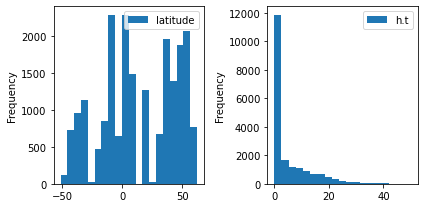

In [69]:
# plot two figures showing the distribution of latitude of the samples and heights of the samples
panel_x,panel_y=1,2

fig, axes = plt.subplots(panel_x,panel_y,figsize=(panel_y*3,panel_x*3))
# here note that the order of x and y are reversed when defining figsize

df_data.plot(y='latitude',kind='hist',ax=axes[0],bins=20)
df_data.plot(y='h.t',kind='hist',ax=axes[1],bins=np.linspace(0.,50.,20))

fig.tight_layout()
plt.savefig('./baad_pandas_hist.png',dpi=300)

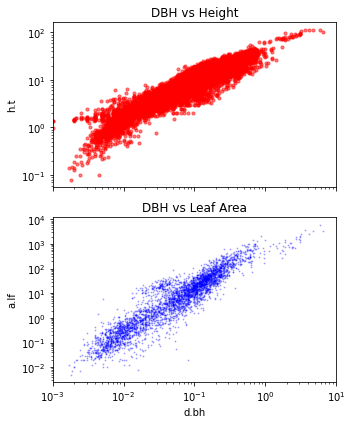

In [28]:
# scatter plot diameter and height and diameter with leaf area
panel_x,panel_y=2,1

# we ask the two figures to share x
fig, axes = plt.subplots(panel_x,panel_y,figsize=(panel_y*5,panel_x*3),
                         sharex=True)
# here note that the order of x and y are reversed when defining figsize

df_data.plot(x='d.bh',y='h.t',kind='scatter',ax=axes[0],s=10,c='r',alpha=0.5
            ,loglog=True,xlim=[1e-3,10.])
axes[0].set_title('DBH vs Height')

df_data.plot(x='d.bh',y='a.lf',kind='scatter',ax=axes[1],s=1,c='b',alpha=0.25, edgecolor=None
            ,loglog=True,xlim=[1e-3,10.])
axes[1].set_title('DBH vs Leaf Area')

fig.tight_layout()
plt.savefig('./baad_pandas_scatter.png',dpi=300)

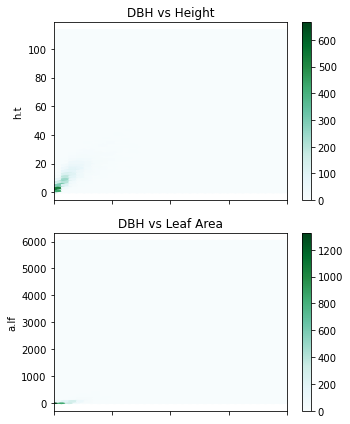

In [33]:
# scatter plot diameter and height and diameter with leaf area
panel_x,panel_y=2,1

# we ask the two figures to share x
fig, axes = plt.subplots(panel_x,panel_y,figsize=(panel_y*5,panel_x*3),
                         sharex=True)
# here note that the order of x and y are reversed when defining figsize

df_data.plot(x='d.bh',y='h.t',kind='hexbin',ax=axes[0])
axes[0].set_title('DBH vs Height')
axes[0].set_xlim((0,2))

df_data.plot(x='d.bh',y='a.lf',kind='hexbin',ax=axes[1])
axes[1].set_title('DBH vs Leaf Area')
axes[1].set_xlim((0,2))
fig.tight_layout()
plt.savefig('./baad_pandas_scatter.png',dpi=300)

In [35]:
print(axes[0].get_xlim())

(0.0, 2.0)


There are more tricks to plot with pandas. Check [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) for more.

Here I am showing one more example of grouping

<AxesSubplot:title={'center':'h.t'}, xlabel='[vegetation]'>

<Figure size 864x216 with 0 Axes>

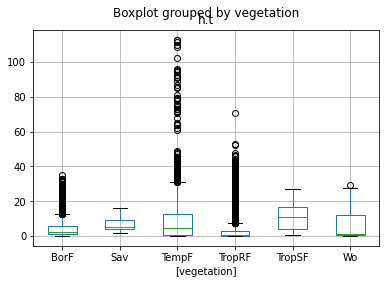

In [8]:
#subset df by selecting forest vegetation types
df_sub = df_data[df_data['vegetation'].isin(['BorF','Sav','TempF','TropRF','TropSF','Wo'])]
df_sub.to_csv('./baad_forest.csv')

fig = plt.figure(figsize=(12,3))
df_sub.boxplot(column=['h.t'],by=['vegetation'])


### 4. Spatial maps with Cartopy


In [36]:
import cartopy.crs as ccrs

Let's start with a global map with coastlines

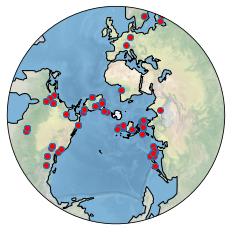

In [39]:
fig = plt.figure()

#ax = plt.axes(projection=ccrs.Mollweide())
ax = plt.axes(projection=ccrs.SouthPolarStereo())

# you can try a few more projections such as
# Mercator (not suggested to use due to extortion over the polar regions)
# InterruptedGoodeHomolosine
# SouthPolarStereo

ax.stock_img()

ax.coastlines()

# add sample location from the baad database
baad_latlon=df_data[['longitude','latitude']].sample(200) # randomly sample 100

ax.plot(baad_latlon['longitude'],
        baad_latlon['latitude'],
        marker='o',
        markerfacecolor='r',
        linestyle='',
        transform=ccrs.PlateCarree())

plt.show()

Then, let's try to overlay the synthetic abudnance data over US state boundaries

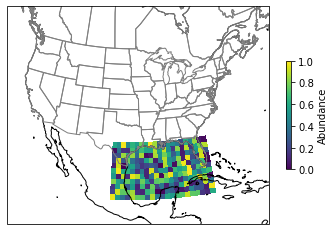

In [41]:
import cartopy.feature as cfeature

fig = plt.figure()

# projection is for plot
# transform is for data

plot_proj = ccrs.LambertConformal()
latlon_proj = ccrs.PlateCarree() # used if you have lat/lon data
             
ax = plt.axes(projection=plot_proj)




lon = np.linspace(-100, -80, 21)
lat = np.linspace(20, 30, 11)

lon2d, lat2d = np.meshgrid(lon, lat)



abundance_mat = np.random.random(lon2d.shape) 



hpc = ax.pcolormesh(lon2d, lat2d,abundance_mat,vmin=0,vmax=1,transform=latlon_proj)
ax.set_extent([-120,-70,15,55],latlon_proj)
ax.coastlines()


# add state borders

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth

ax.add_feature(cfeature.STATES,facecolor='none',edgecolor='gray')


plt.colorbar(hpc,ax=ax, shrink=.5,label='Abundance')

plt.show()


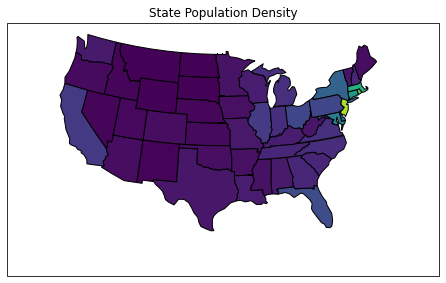

In [43]:
import cartopy.io.shapereader as shpreader
from matplotlib import cm

viridis = cm.get_cmap('viridis')

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.PlateCarree())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

popdensity = {
    'New Jersey':  438.00,
    'Rhode Island':   387.35,
    'Massachusetts':   312.68,
    'Connecticut':    271.40,
    'Maryland':   209.23,
    'New York':    155.18,
    'Delaware':    154.87,
    'Florida':     114.43,
    'Ohio':  107.05,
    'Pennsylvania':  105.80,
    'Illinois':    86.27,
    'California':  83.85,
    'Virginia':    69.03,
    'Michigan':    67.55,
    'Indiana':    65.46,
    'North Carolina':  63.80,
    'Georgia':     54.59,
    'Tennessee':   53.29,
    'New Hampshire':   53.20,
    'South Carolina':  51.45,
    'Louisiana':   39.61,
    'Kentucky':   39.28,
    'Wisconsin':  38.13,
    'Washington':  34.20,
    'Alabama':     33.84,
    'Missouri':    31.36,
    'Texas':   30.75,
    'West Virginia':   29.00,
    'Vermont':     25.41,
    'Minnesota':  23.86,
    'Mississippi':   23.42,
    'Iowa':  20.22,
    'Arkansas':    19.82,
    'Oklahoma':    19.40,
    'Arizona':     17.43,
    'Colorado':    16.01,
    'Maine':  15.95,
    'Oregon':  13.76,
    'Kansas':  12.69,
    'Utah':  10.50,
    'Nebraska':    8.60,
    'Nevada':  7.03,
    'Idaho':   6.04,
    'New Mexico':  5.79,
    'South Dakota':  3.84,
    'North Dakota':  3.59,
    'Montana':     2.39,
    'Wyoming':      1.96}

#ax.background_patch.set_visible(False)
#ax.outline_patch.set_visible(False)

ax.set_title('State Population Density')

for astate in shpreader.Reader(states_shp).records():

    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_dens = popdensity[ astate.attributes['name'] ]
    except:
        state_dens = 0

    # simple scheme to assign color to each state
    #if state_dens < 40:
    #    facecolor = "lightyellow"
    #elif state_dens > 200:
    #    facecolor = "red"
    #else:
    #    facecolor = "pink"
    facecolor = viridis(state_dens / 500.)

   
    h = ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)
    
plt.show()

### Challenge 3. Plot global distribution of sampling density in BAAD database

Count the sampling density for a 2-by-2 degree windows and plot it over a global map

In [83]:
# first calculate the sampling density

# 5-by-5 degree cells starting from -180, -90
grid_res = 10.

lon = np.arange(-180, 180, grid_res)
lat = np.arange(-90,  90,  grid_res)

# create meshgrid
lon2d, lat2d = np.meshgrid(lon, lat)

# create a matrix to store sample density
sample_density = np.full(lon2d.shape,fill_value=np.nan,dtype=float)

# loop over matrix to find sampling density for each grid cell
for ilat in range(sample_density.shape[0]):
    for ilon in range(sample_density.shape[1]):
        # get the lat and lon of the grid cell
        grid_lon, grid_lat = lon[ilon], lat[ilat]
        
        #print(grid_lon,grid_lat)

        # note that this is the lower left corner of the grid cell
        # find the # of data points within this range
        sample_density[ilat,ilon] = sum(
            (df_data['longitude'] >= grid_lon) & (df_data['longitude'] < grid_lon + grid_res)
        &   (df_data['latitude'] >= grid_lat) & (df_data['latitude']  < grid_lat + grid_res)
        )
    




In [81]:
grid_lon, grid_lat, grid_res = -100,30,10

print(sum(
            (df_data['longitude'] >= grid_lon) & (df_data['longitude'] < grid_lon + grid_res)
        &   (df_data['latitude'] >= grid_lat) & (df_data['latitude']  < grid_lat + grid_res)
        ))

58


In [82]:
print(sum(
    (df_data['longitude'] >= grid_lon) & (df_data['longitude'] < grid_lon + grid_res)
   &(df_data['latitude'] >= grid_lat) & (df_data['latitude'] < grid_lat + grid_res)
))

58


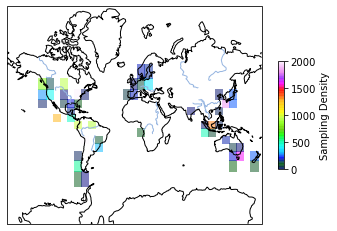

In [85]:
fig = plt.figure()

# projection is for plot
# transform is for data

plot_proj = ccrs.Mercator()
latlon_proj = ccrs.PlateCarree() # used if you have lat/lon data
             
ax = plt.axes(projection=plot_proj)

sample_density[sample_density == 0] = np.nan

hpc = ax.pcolormesh(lon2d, lat2d,sample_density,vmin=0,vmax=2000,
                    cmap=cm.gist_ncar,transform=latlon_proj,
                    alpha=0.5)

#ax.set_extent([-120,-70,15,55],latlon_proj)
ax.coastlines()


# add state borders

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth

ax.add_feature(cfeature.RIVERS)


plt.colorbar(hpc,ax=ax, shrink=.5,label='Sampling Density')

plt.show()


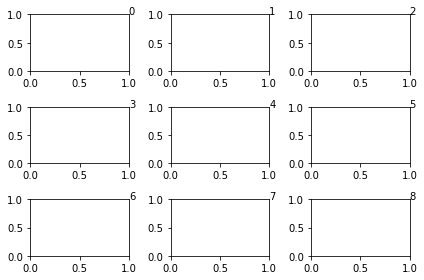

In [90]:
fig, axes = plt.subplots(3,3)
for i, ax in enumerate(axes.ravel()):
    ax.text(1,1,f'{i}')
fig.tight_layout()
plt.show()

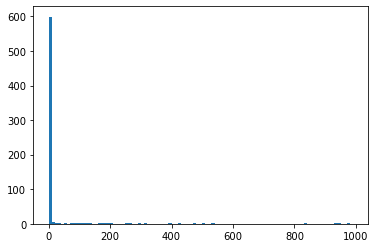

In [84]:
fig = plt.figure()
plt.hist(sample_density.ravel(),bins=np.arange(0,1000,10))
plt.show()

<AxesSubplot:ylabel='Frequency'>

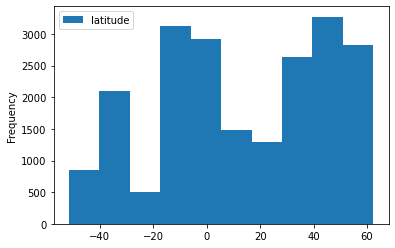

In [72]:
df_data.plot(y='latitude',kind='hist')